In [1]:
import numpy as np
import matplotlib.pyplot as plt #plotting package
%matplotlib inline

In [2]:
#  Define the distribution to be sampled
def prob_dist1(x, p1, p2, A):
    """Gaussian distribution with mean mu, 
    Standard deviation sigma and 'amplitude' A
    (A = 1 gives normalized gaussian.)"""
    mu = p1
    sigma = p2
    chi_sq = 0.5*((x - mu)/sigma)**2
    f = A*np.exp(-1.0*chi_sq)/(np.sqrt(2.0*np.pi)*sigma)
    return f

def prob_dist2(x, p1, p2, A):
    """Sum of two Gaussian distribution with mean mu1 & mu2, 
    Standard deviation sigma1 & sigma2 and 'amplitudes' A1 & A2
    (e.g. A1 = 0.5 & A2 = 0.5 gives normalized gaussian.)"""
    A1 = 0.5
    mu1 = p1
    sigma1 = p2
    chi_sq1 = 0.5*((x - mu1)/sigma1)**2
    f1 = A1*np.exp(-1.0*chi_sq1)/(np.sqrt(2.0*np.pi)*sigma1)
    A2 = 0.5
    mu2 = p1 + 3*p2
    sigma2 = p2*0.5
    chi_sq2 = 0.5*((x - mu2)/sigma2)**2
    f2 = A2*np.exp(-1.0*chi_sq2)/(np.sqrt(2.0*np.pi)*sigma2)
    return f1 + f2

In [3]:
#parameter of the distribution to be sampled
p1 = 0.0
p2 = 1.0
A = 1.0 #for normalized gaussian distribution

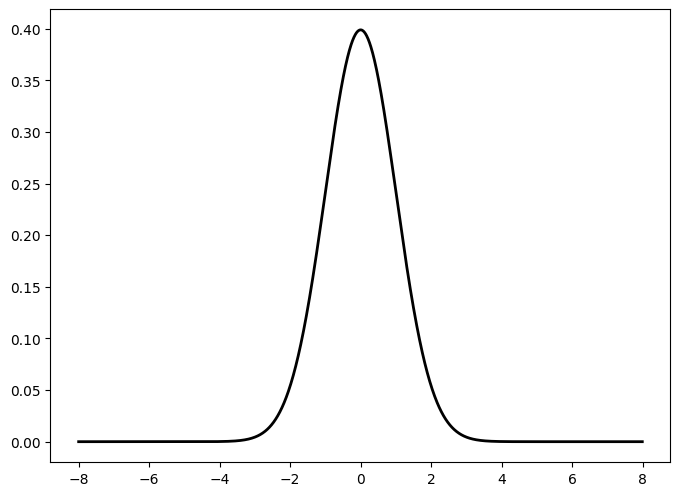

In [4]:
fig = plt.figure(figsize=(8,6), dpi=100)
fig.add_subplot(111)
x = np.arange(-8*p2, 8*p2, 0.01)
plt.plot(x, prob_dist1(x, p1, p2, A), linewidth = 2.0, color = 'k')

In [5]:
#Choose initial point to start the chain
theta_0 = 1.0
theta_i = theta_0

#Parameters of the proposal distribution
#In our example, standard deviation of the gaussian proposal distribution
sigma_p = 1.0

In [6]:
#Seed for random number generation while sampling
seed1 = 10247
np.random.seed(seed = seed1)

In [7]:
#number of samples
nsample = 100000

In [8]:
#array to store total sample
total_sample = np.ndarray(shape = (nsample, 2))
#array to store accepted sample
acptd_sample = np.ndarray(shape = (nsample, 2))

#array to store the value of distribution function
f = np.ndarray(shape = (nsample, 1))

In [9]:
#Compute the function at the starting point
f[0] = prob_dist1(theta_i, p1, p2, A)

In [10]:
xc = -0.75
xl = -1.15
xr = 0.00

In [11]:
dx = 0.1

In [12]:
rand_num_list = []
c_count = 0
r_count = 0
l_count = 0
acc_r_count = 0
acc_l_count = 0
#Following loop does the Markov Chain Monte Carlo (MCMC) 
#sampling of the distribution.

n_accept=0
for i in range(1, nsample,1):
    ##gaussian proposal distribution
    theta_star = np.random.normal(loc = theta_i, scale = sigma_p, size = 1)
    total_sample[i,:] = np.asarray([i, theta_star[0]])
    ##Compute function at the proposed point
    f_star = prob_dist1(theta_star, p1, p2, A)
    #%%%%%%%
    if acptd_sample[i-1,1] < xc + dx and acptd_sample[i-1,1] > xc - dx:
        flag = 1
        c_count += 1
        #print("In xc")
    else:
        flag = 0
    #%%%%%%%
    if flag == 1:
        if theta_star < xl + dx and theta_star > xl - dx:
            l_count += 1
            #print("In xl")
        elif theta_star < xr + dx and theta_star > xr - dx:
            r_count += 1
            #print("In xr")
    #Metropolis rule
    if f_star > f[i-1]:
        ##accept proposed point
        theta_i = theta_star
        acptd_sample[i,0] = i
        acptd_sample[i,1] = theta_i
        f[i] = f_star
        n_accept += 1
    else:
        alpha = np.random.uniform(low=0.0, high=1.0, size=None)
        ratio = f_star/f[i -1]
        if ratio > alpha:
            ##accept proposed point
            theta_i = theta_star
            acptd_sample[i,:] = np.asarray([i, theta_i[0]])
            f[i] = f_star
            n_accept += 1
        else:
            ##reject proposed point
            theta_i = theta_i #chain stays at the currant point.
            #Currant (not the proposed) point is re-added to the accepted sample.
            acptd_sample[i,:] = np.asarray([i, theta_i[0]])
            f[i] = f[i-1]
    #print("acceptance ratio:")
    #print(n_accept/(1.0*i))
    #rand_num_list.append(alpha)
    if flag == 1:
        if acptd_sample[i,1] < xl + dx and acptd_sample[i,1] > xl - dx:
            acc_l_count += 1
            #print("In xl")
            rand_num_list.append(alpha)
        elif acptd_sample[i,1] < xr + dx and acptd_sample[i,1] > xr - dx:
            acc_r_count += 1
            #print("In xr")

In [13]:
print([c_count, r_count, l_count])

[6076, 368, 445]


In [14]:
print([acc_r_count, acc_l_count])

[368, 306]


In [15]:
1.0*acc_l_count/l_count

0.6876404494382022

In [16]:
1.0*acc_r_count/r_count

1.0

In [17]:
0.2/0.3

0.6666666666666667

In [18]:
len(rand_num_list)

306

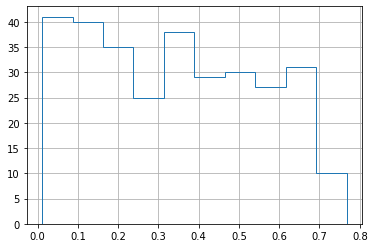

In [19]:
h1 = plt.hist(rand_num_list, bins=10, histtype='step')
plt.grid()
plt.show()

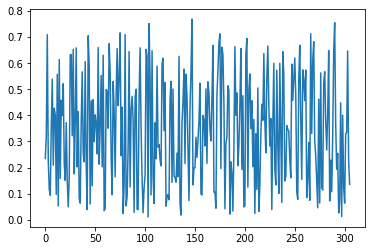

In [20]:
plt.plot(rand_num_list)
plt.show()

In [21]:
prob_dist1(xr, p1, p2, A)

0.3989422804014327

In [22]:
prob_dist1(xc, p1, p2, A)

0.30113743215480443

In [23]:
prob_dist1(xl, p1, p2, A)

0.20593626871997478

In [24]:
prob_dist1(xl, p1, p2, A)/prob_dist1(xc, p1, p2, A)

0.6838614092123559

In [25]:
prob_dist1(xl-dx, p1, p2, A)/prob_dist1(xc+dx, p1, p2, A)

0.5655254386995371

In [26]:
prob_dist1(xl+dx, p1, p2, A)/prob_dist1(xc-dx, p1, p2, A)

0.8269591339433624